In [205]:
import pandas as pd
import os
import numpy as np
import pickle
from datetime import datetime, time

In [206]:
os.chdir(r"C:\Users\shantanu.sharma\Desktop\HC")

In [207]:
df=pd.read_csv(r"C:\Users\shantanu.sharma\Desktop\HC\hm_features_dv_new_customers.csv")

In [208]:
df.head()

,first_txn_date_lazypay,dv,filter,is_repaid,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,total_amount_6month,...,dc_sale_per,ecommerce_ratio_180,acc_30_180_amount,acc_90_360_amount,acc_180_360_count,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,scoring_date
0,07-03-2019,0,1,N,3,2704.08,1,1352.04,3,2704.08,...,0.333333,0.500000,0.0,1.000000,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
1,07-03-2019,1,1,N,1,150.00,1,150.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,31-12-2019
2,07-03-2019,0,1,N,1,25.00,1,25.00,1,25.00,...,1.000000,0.000000,0.0,0.000000,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
3,07-03-2019,0,1,N,2,277.00,1,78.00,2,277.00,...,0.500000,0.281588,0.0,0.281588,1.0,1.0,-10.0,-10.0,-10.0,31-12-2019
4,07-03-2019,1,1,N,1,1.00,0,0.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,31-12-2019


In [209]:
df.describe().transpose().to_csv("describe_raw_data.csv")

In [210]:
pd.DataFrame(df.dtypes).to_csv("datatypes.csv")

In [211]:
for x in df.columns:
    print(df[x].value_counts())


06-04-2019    1065
17-03-2019     978
10-03-2019     958
07-04-2019     956
07-03-2019     876
              ... 
30-04-2019     585
20-04-2019     581
27-04-2019     570
25-04-2019     499
21-03-2019     184
Name: first_txn_date_lazypay, Length: 75, dtype: int64
0    51784
1     2580
Name: dv, dtype: int64
1    54364
Name: filter, dtype: int64
N    54364
Name: is_repaid, dtype: int64
1      13962
0      10372
2       8835
3       4887
4       3587
       ...  
103        1
295        1
327        1
359        1
255        1
Name: total_count_12month, Length: 207, dtype: int64
0.00       10372
100.00      1000
200.00       722
1.00         577
9.00         387
           ...  
7211.14        1
6078.08        1
2751.20        1
5541.00        1
378.40         1
Name: total_amount_12month, Length: 18809, dtype: int64
0      32035
1      14225
2       3885
3       1502
4        845
       ...  
74         1
42         1
105        1
136        1
127        1
Name: sale_count_12month, Leng

0      16605
1      13509
2       7388
3       4257
4       2865
       ...  
594        1
105        1
361        1
177        1
111        1
Name: failed_count_360, Length: 182, dtype: int64
0.00       16628
100.00       919
200.00       471
1.00         428
50.00        379
           ...  
6209.00        1
2668.94        1
4984.00        1
2626.72        1
441.24         1
Name: failed_amount_360, Length: 16149, dtype: int64
0.000000    46944
1.000000     5446
0.500000      731
0.666667      333
0.750000      190
            ...  
0.552632        1
0.578947        1
0.632653        1
0.545455        1
0.863636        1
Name: failed_count_30_ratio, Length: 125, dtype: int64
0.000000    46953
1.000000     5459
0.500000      376
0.666667       95
0.750000       47
            ...  
0.023333        1
0.641975        1
0.545632        1
0.435887        1
0.894210        1
Name: failed_amount_30_ratio, Length: 1331, dtype: int64
0.000000    38205
1.000000    10359
0.500000     1711
0.666

0.000000    54315
1.000000        8
0.500000        2
0.746114        1
0.328648        1
0.363703        1
0.014246        1
0.570199        1
0.082191        1
0.019589        1
0.545872        1
0.004128        1
0.031282        1
0.002534        1
0.067992        1
0.758621        1
0.166677        1
0.278369        1
0.123409        1
0.095035        1
0.750000        1
0.282920        1
0.243055        1
0.007141        1
0.163864        1
0.391456        1
0.309823        1
0.251617        1
0.591578        1
0.700105        1
0.066779        1
0.289420        1
0.333333        1
0.427648        1
0.296131        1
0.005640        1
0.298039        1
0.260254        1
0.208098        1
0.441113        1
0.160978        1
0.030368        1
Name: apple_amount_180_ratio, dtype: int64
0.000000    54313
0.166667        5
1.000000        5
0.500000        5
0.333333        4
0.400000        3
0.125000        3
0.200000        2
0.181818        2
0.100000        2
0.062500        2
0.2

0      15991
1      13873
2       7911
3       4127
4       2944
       ...  
141        1
717        1
78         1
110        1
319        1
Name: Apple_count_360, Length: 178, dtype: int64
0.00          15991
100.00         1042
200.00          663
1.00            589
9.00            416
              ...  
522.58            1
1439.17           1
315278.00         1
12754.00          1
1627666.01        1
Name: Apple_amount_360, Length: 15797, dtype: int64
0.000000    51573
1.000000     1895
0.500000      294
0.333333      122
0.666667       71
            ...  
0.421053        1
0.342105        1
0.755556        1
0.938776        1
0.043478        1
Name: Apple_count_30_ratio, Length: 117, dtype: int64
0.000000    51573
1.000000     1920
0.500000      136
0.333333       19
0.250000       11
            ...  
0.791724        1
0.364807        1
0.261017        1
0.754717        1
0.018003        1
Name: Apple_amount_30_ratio, Length: 696, dtype: int64
0.000000    41883
1.000000     

 0.000000     27657
-10.000000    26450
 1.000000       168
 0.500000        32
 0.333333        14
 0.666667         6
 0.200000         6
 0.250000         5
 0.166667         5
 0.066667         2
 0.428571         2
 0.285714         2
 0.400000         2
 0.750000         1
 0.142857         1
 0.375000         1
 0.008696         1
 0.111111         1
 0.300000         1
 0.076923         1
 0.100000         1
 0.875000         1
 0.047619         1
 0.181818         1
 0.090909         1
 0.753425         1
Name: ratio_count_ecom_in_cc_180, dtype: int64
-10.000000    27700
 0.000000     26407
 1.000000       181
 0.500000        24
 0.666667        13
 0.333333        12
 0.250000         7
 0.166667         4
 0.600000         2
 0.800000         2
 0.400000         2
 0.125000         1
 0.142857         1
 0.636364         1
 0.375000         1
 0.285714         1
 0.982143         1
 0.200000         1
 0.083333         1
 0.833333         1
 0.750000         1
Name: ratio_c

-10.000000    36802
 0.000000     16523
 1.000000       801
 0.500000        93
 0.666667        38
 0.333333        36
 0.250000         9
 0.200000         8
 0.750000         6
 0.166667         5
 0.833333         4
 0.125000         3
 0.800000         3
 0.100000         3
 0.400000         3
 0.600000         3
 0.636364         1
 0.625000         1
 0.076923         1
 0.059701         1
 0.035714         1
 0.011628         1
 0.714286         1
 0.222222         1
 0.285714         1
 0.066667         1
 0.700000         1
 0.571429         1
 0.020000         1
 0.857143         1
 0.818182         1
 0.057143         1
 0.013889         1
 0.027027         1
 0.875000         1
 0.083333         1
 0.047619         1
 0.888889         1
 0.090909         1
 0.642857         1
Name: ratio_count_ecom_in_nb_360, dtype: int64
-10.000000    39542
 0.000000     13783
 1.000000       603
 0.500000       157
 0.333333        56
 0.666667        41
 0.250000        31
 0.750000    

-10.00       41233
 349.00        570
 100.00        490
 299.00        352
 1000.00       206
             ...  
 9831.00         1
 974.21          1
 41580.00        1
 913.79          1
 1081.87         1
Name: amt_first_nb_txn, Length: 3645, dtype: int64
-10.000000    41292
 1.000000      5751
 0.500000        38
 2.000000        31
 5.000000        30
              ...  
 0.262391         1
 0.188525         1
 1.305556         1
 14.551231        1
 7.290000         1
Name: amt_first_nb_to_amt_first_txn, Length: 6263, dtype: int64
-10.00       5815
 100.00      2347
 50.00       1273
 1.00         861
 10.00        848
             ... 
 123.04         1
 35017.00       1
 3389.00        1
 739.37         1
 4346.23        1
Name: amt_first_failed_txn, Length: 9352, dtype: int64
 1.000000     42051
-10.000000     6139
 2.000000        90
 0.500000        72
 0.000000        31
              ...  
 0.335430         1
 3.303571         1
 37.932308        1
 1.124613         1
 0.

0     54046
1       208
2        72
3        16
4        12
7         3
5         3
16        1
10        1
9         1
8         1
Name: top_merchants_txn_cc_count_30, dtype: int64
0.00       54046
199.00        17
399.00         9
169.00         7
499.00         4
           ...  
609.00         1
1506.46        1
379.00         1
1565.00        1
5025.20        1
Name: top_merchants_txn_cc_amount_30, Length: 249, dtype: int64
 0.000000     53397
-10.000000      649
 1.000000       232
 0.500000        56
 0.666667         6
 0.333333         4
 0.750000         4
 0.555556         2
 0.800000         2
 0.166667         2
 0.200000         2
 0.600000         1
 0.142857         1
 0.411765         1
 0.100000         1
 0.875000         1
 0.583333         1
 0.941176         1
 0.400000         1
Name: top_merchants_txn_cc_count_30_ratio, dtype: int64
 0.000000     53397
-10.000000      649
 1.000000       232
 0.500000        45
 0.820988         1
 0.319119         1
 0.384776  

1       12279
2        8622
3        5570
4        4367
5        3186
        ...  
206         1
174         1
296         1
392         1
1119        1
Name: top_device_family_count, Length: 274, dtype: int64
100.00      720
1.00        575
200.00      551
9.00        319
250.00      264
           ... 
30774.95      1
14289.80      1
4567.10       1
1565.44       1
965.47        1
Name: top_device_family_amount, Length: 29255, dtype: int64
1.000000    52864
0.666667      126
0.500000      119
0.750000      108
0.800000       73
            ...  
0.992908        1
0.976000        1
0.911765        1
0.848649        1
0.987500        1
Name: top_device_family_count_per, Length: 234, dtype: int64
1.000000    52874
0.500000       35
0.666667       14
0.833333        6
0.750000        4
            ...  
0.973240        1
0.859401        1
0.963507        1
0.538449        1
0.923788        1
Name: top_device_family_amount_per, Length: 1431, dtype: int64
0      7739
19     3722
5      25

In [212]:
df["first_txn_date_lazypay"] = pd.to_datetime(df["first_txn_date_lazypay"], format = "%d-%m-%Y")
df["first_txn_date_lazypay"].agg(["max","min"])
df["month"]= pd.to_datetime(df["first_txn_date_lazypay"], format = "%d-%m-%Y").dt.strftime("%Y-%m")

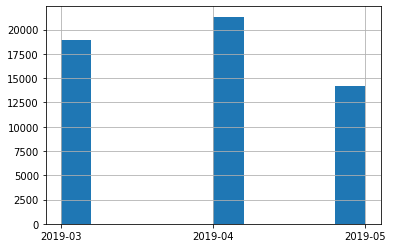

In [213]:
plt = df["first_txn_date_lazypay"].dt.strftime("%Y-%m").sort_index().hist()
plt

In [214]:
bad_rate=df[["month","dv"]].groupby("month").agg(["sum","count"])
bad_rate.columns=["_".join(x) for x in bad_rate.columns.ravel()]
bad_rate["rate"] = bad_rate["dv_sum"]/bad_rate["dv_count"]
bad_rate
#bad_rate["rate"] = bad_rate["sum"]/bad_rate["count"]

,dv_sum,dv_count,rate
month,,,
2019-03,1010,18888,0.053473
2019-04,985,21320,0.046201
2019-05,585,14156,0.041325


In [215]:
df.drop(columns = ["filter","is_repaid","scoring_date"],inplace = True)

In [216]:
df.head()

,first_txn_date_lazypay,dv,total_count_12month,total_amount_12month,sale_count_12month,sale_amount_12month,total_count_6month,total_amount_6month,sale_count_6month,sale_amount_6month,...,dc_sale_per,ecommerce_ratio_180,acc_30_180_amount,acc_90_360_amount,acc_180_360_count,acc_180_360_amount,acc_30_90_amount_cc,acc_90_180_amount_cc,acc_180_360_amount_cc,month
0,2019-03-07,0,3,2704.08,1,1352.04,3,2704.08,1,1352.04,...,0.333333,0.500000,0.0,1.000000,1.0,1.0,-10.0,-10.0,-10.0,2019-03
1,2019-03-07,1,1,150.00,1,150.00,0,0.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,2019-03
2,2019-03-07,0,1,25.00,1,25.00,1,25.00,1,25.00,...,1.000000,0.000000,0.0,0.000000,1.0,1.0,-10.0,-10.0,-10.0,2019-03
3,2019-03-07,0,2,277.00,1,78.00,2,277.00,1,78.00,...,0.500000,0.281588,0.0,0.281588,1.0,1.0,-10.0,-10.0,-10.0,2019-03
4,2019-03-07,1,1,1.00,0,0.00,0,0.00,0,0.00,...,-10.000000,-10.000000,-10.0,0.000000,0.0,0.0,-10.0,-10.0,-10.0,2019-03


In [217]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
import xgboost as xgb

In [218]:
def fimportances(xc, predictors):
    importances = pd.DataFrame({'predictor': predictors, 'importance': xc.feature_importances_})
    importances = importances[importances['importance'] > 0]
    importances.sort_values(by='importance', ascending=False, inplace=True)
    importances.reset_index(inplace=True, drop=True)
    importances = importances[['predictor', 'importance']]
    return importances
    

In [219]:
df.select_dtypes(exclude=["int64","float64"]).dtypes

first_txn_date_lazypay    datetime64[ns]
month                             object
dtype: object

In [220]:
df_test = df[df["first_txn_date_lazypay"]>= datetime(2019,5,1)]
df_train = df[df["first_txn_date_lazypay"]< datetime(2019,5,1)]


In [221]:
X_test = df_test.drop(columns = "dv")
X_train = df_train.drop(columns = "dv")
Y_test = df_test["dv"]
Y_train = df_train["dv"]

In [222]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.3, stratify =X_train["month"])

In [223]:
print("Event Rate Train: ", '{:,.2%}'.format(Y_train.sum()/Y_train.count()), "\t shape:", len(Y_train))
print("Event Rate Valid: ", '{:,.2%}'.format(Y_valid.sum()/Y_valid.count()), "\t shape:", len(Y_valid))
print("Event Rate Test: ", '{:,.2%}'.format(Y_test.sum()/Y_test.count()), "\t shape:", len(Y_test))



Event Rate Train:  5.08% 	 shape: 28145
Event Rate Valid:  4.69% 	 shape: 12063
Event Rate Test:  4.13% 	 shape: 14156


In [224]:
param_grid = {'max_depth': np.arange(1,6),
              'learning_rate': np.arange(0.001, 0.02, 0.001),
              'subsample': np.arange(0.4, 0.7, 0.05),
              'min_child_weight': np.arange(1, 25, 3),
              'colsample_bytree': np.arange(0.5, 0.75, 0.05),
              'scale_pos_weight' :np.arange(5, 40, 2)
            }

param_dist = {'objective': 'binary:logistic', 'nthread': -1, 'n_estimators': 200}


In [225]:
xgb_model= xgb.XGBClassifier(**param_dist)

In [226]:
kfolds = StratifiedKFold(3, random_state=1)
clf = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring=['roc_auc'], n_iter=100,
                         random_state=40, cv=kfolds.split(X_train.drop(columns=['first_txn_date_lazypay','month']), Y_train), refit='roc_auc',error_score=0, return_train_score =True)

In [ ]:
print("Randomized search..")

search_time_start = datetime.now()
clf.fit(X_train.drop(columns=['first_txn_date_lazypay','month']), np.ravel(Y_train))
print("Randomized search time:",  datetime.now() - search_time_start)

params = clf.best_params_   
dic=clf.cv_results_ 
tmp =  pd.DataFrame(dic["params"])

Randomized search..


In [ ]:
print("Best score: {}".format(clf.best_score_))    #best auc score as we took that for refit 

In [ ]:
print("Best params: ")

for param_name in sorted(params.keys()):
    print('%s: %r' % (param_name, params[param_name]))
    lg.write('\n %s: %r' % (param_name, params[param_name]))

#update estimated hyperparameter values to new model
params.update(param_dist)
xgb_model = xgb.XGBClassifier(**params)

In [ ]:
auc_cv = cross_val_score(xgb_model, X_train.drop(columns = 'RISK_SCORE'), Y_train, scoring='roc_auc', cv=kfolds.split(X_train.drop(columns='RISK_SCORE'), Y_train),
                         n_jobs=cpu)
gini_cv = (2 * np.array(auc_cv) - 1).mean()


bst = xgb_model.fit(X_train.drop(columns='RISK_SCORE'), np.ravel(Y_train), eval_metric="auc", eval_set=[(X_test.drop(columns='RISK_SCORE'), np.ravel(Y_test))],
                    early_stopping_rounds=early_stopping_round,  verbose=True)


if early_stopping_round is None:
    ypred_train = bst.predict_proba(X_train.drop(columns = 'RISK_SCORE'))[:, 1]
    ypred_test = bst.predict_proba(X_test.drop(columns = 'RISK_SCORE'))[:, 1]
else:
    ypred_train = bst.predict_proba(X_train.drop(columns = 'RISK_SCORE'), ntree_limit=bst.best_ntree_limit)[:, 1]
    ypred_test = bst.predict_proba(X_test.drop(columns = 'RISK_SCORE'), ntree_limit=bst.best_ntree_limit)[:, 1]

metric_auc_train = metrics.roc_auc_score(Y_train, ypred_train)
metric_auc_test = metrics.roc_auc_score(Y_test, ypred_test)

gini_train = 2 * metric_auc_train - 1
gini_test = 2 * metric_auc_test - 1


importance_tbl = fimportances(bst, X_train.drop(columns = 'RISK_SCORE').columns)
importance_tbl.to_csv(os.getcwd()+"/varimpt_xgb_fstpd_clx_wo_hcscore_"+datetime.now().strftime("%d_%b_%H")+"hrs.csv",index=0)


print("GINI TRAIN:",gini_train )
print("\nGINI TEST:",gini_test )
print("\nGINI CV:",gini_cv )